In [1]:
#Import relevant libraries for data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


emissions_df = pd.read_csv('/Users/alexandreribeiro/Desktop/Emissions_dataset.csv')
foodwaste_df = pd.read_csv('/Users/alexandreribeiro/Desktop/Food-Waste_dataset.csv')

#Check the first 5 rows of the emissions dataset

emissions_df.head()




,country,year,element,item,unit,value
0,Angola,2010,Carbon Dioxide (CO2),Agrifood Systems Waste Disposal,kt,1134.35
1,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57
2,Angola,2010,Carbon Dioxide (CO2),Food Household Consumption,kt,281.49
3,Angola,2010,Carbon Dioxide (CO2),Food Packaging,kt,8.13
4,Angola,2010,Carbon Dioxide (CO2),Food Processing,kt,0.00


In [2]:
emissions_df.item.value_counts()

item
Agrifood Systems Waste Disposal    3420
Manure Management                  3420
Food Transport                     3398
Food Retail                        3354
Food Household Consumption         3332
Food Packaging                     2892
Food Processing                    2892
Crop Residues                      2280
Manure applied to Soils            2280
Manure left on Pasture             2280
Synthetic Fertilizers              2258
Rice Cultivation                   1860
Name: count, dtype: int64

In [3]:
foodwaste_df.head()

,country,year,food_supply_stage,commodity,loss_percentage
0,Angola,2010,Farm,Maize (corn),3.6
1,Angola,2010,Farm,Millet,1.7
2,Angola,2010,Farm,Rice,1.5
3,Angola,2010,Farm,Sorghum,3.0
4,Angola,2010,Farm,Wheat,4.2


In [4]:
#In order to merge the two datasets, we can create a mapping based on the logical correspondence between the food_supply_stage and items.

# Get unique values of 'food_supply_stage' and 'item'

food_supply_stages = foodwaste_df['food_supply_stage'].unique()
items = emissions_df['item'].unique()

food_supply_stages, items

(array(['Farm', 'Harvest', 'Shelling and processing', 'Storage',
        'Transport', 'Households', 'Retail, wholesale and market',
        'Whole supply chain', 'Distribution and export', 'Packing'],
       dtype=object),
 array(['Agrifood Systems Waste Disposal', 'Crop Residues',
        'Food Household Consumption', 'Food Packaging', 'Food Processing',
        'Food Retail', 'Food Transport', 'Manure Management',
        'Manure applied to Soils', 'Manure left on Pasture',
        'Rice Cultivation', 'Synthetic Fertilizers'], dtype=object))

In [5]:
# Create a mapping dictionary for food_supply_stage to item

mapping = {
    'Farm': ['Crop Residues', 'Rice Cultivation', 'Synthetic Fertilizers'],
    'Harvest': ['Crop Residues'],
    'Shelling and processing': ['Food Processing'],
    'Storage': ['Food Processing'],  # No direct item mapping
    'Transport': ['Food Transport'],
    'Households': ['Food Household Consumption'],
    'Retail, wholesale and market': ['Food Retail'],
    'Whole supply chain': ['Food Transport'],  # Aggregate, not mapped to a single item
    'Distribution and export': ['Food Transport'],
    'Packing': ['Food Packaging']
}

#Function to apply mapping and filter the emissions dataset

def map_stages(row):
    for stage, items in mapping.items():
        if row['item'] in items:
            return stage
    return np.nan

# Apply the mapping function to create a new column in the emissions dataset

emissions_df['food_supply_stage'] = emissions_df.apply(map_stages, axis=1)

# Check the first 5 rows of the updated emissions dataset

emissions_df.head()



,country,year,element,item,unit,value,food_supply_stage
0,Angola,2010,Carbon Dioxide (CO2),Agrifood Systems Waste Disposal,kt,1134.35,NaN
1,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm
2,Angola,2010,Carbon Dioxide (CO2),Food Household Consumption,kt,281.49,Households
3,Angola,2010,Carbon Dioxide (CO2),Food Packaging,kt,8.13,Packing
4,Angola,2010,Carbon Dioxide (CO2),Food Processing,kt,0.00,Shelling and processing


In [6]:
# Merge the two datasets on 'country' 'year' and 'food_supply_stage'

merged_df = pd.merge(emissions_df, foodwaste_df, on=['country', 'year', 'food_supply_stage'])

# Check the first 5 rows of the merged dataset

merged_df.food_supply_stage.value_counts()

food_supply_stage
Farm                            11208
Shelling and processing          3810
Transport                        2694
Retail, wholesale and market      615
Households                         84
Packing                            78
Name: count, dtype: int64

In [7]:
merged_df.head()

,country,year,element,item,unit,value,food_supply_stage,commodity,loss_percentage
0,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Maize (corn),3.6
1,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Millet,1.7
2,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Rice,1.5
3,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Sorghum,3.0
4,Angola,2010,Carbon Dioxide (CO2),Crop Residues,kt,138.57,Farm,Wheat,4.2


In [8]:
#Describe value and loss_percentage

merged_df[['value', 'loss_percentage']].describe().round(2)

,value,loss_percentage
count,18489.00,18489.00
mean,1579.97,3.29
std,11347.12,4.50
min,0.00,0.00
25%,0.04,1.50
50%,2.93,2.00
75%,124.95,3.50
max,171822.50,63.00


In [9]:
merged_df.commodity.unique()



array(['Maize (corn)', 'Millet', 'Rice', 'Sorghum', 'Wheat', 'Apples',
       'Potatoes', 'Tomatoes', 'Carrots and turnips',
       'Cauliflowers and broccoli',
       'Chillies and peppers, green (<i>Capsicum</i> spp. and <i>Pimenta</i> spp.)',
       'Lettuce and chicory', 'Other vegetables, fresh n.e.c.',
       'Cabbages', 'Sweet corn, frozen', 'Beans, dry', 'Sugar cane',
       'Other fruits, n.e.c.', 'Bananas', 'Cucumbers and gherkins',
       'Eggplants (aubergines)', 'Mangoes, guavas and mangosteens',
       'Okra', 'Oranges', 'Other tropical and subtropical fruits, n.e.c.',
       'Papayas', 'Pineapples', 'Fonio',
       'Pepper (<i>Piper</i> spp.), raw', 'Onions and shallots, green',
       'Cassava, fresh', 'Meat of cattle with the bone, fresh or chilled',
       'Pears', 'Meat of chickens, fresh or chilled', 'Mixed grain',
       'Avocados', 'Cantaloupes and other melons',
       'Chillies and peppers, dry (<i>Capsicum</i> spp., <i>Pimenta</i> spp.), raw',
       'Spinach',

In [10]:
#Group by country and year and get the commodity = 'Meat of cattle with bone'

grouped_df = merged_df[merged_df['commodity'] == 'Meat of cattle with the bone, fresh or chilled']

# Check the first 5 rows of the grouped dataset

grouped_df.head(10)

,country,year,element,item,unit,value,food_supply_stage,commodity,loss_percentage
3067,Canada,2014,Carbon Dioxide (CO2),Food Retail,kt,2375.82,"Retail, wholesale and market","Meat of cattle with the bone, fresh or chilled",3.5
3068,Canada,2014,Methane (CH4),Food Retail,kt,0.07,"Retail, wholesale and market","Meat of cattle with the bone, fresh or chilled",3.5
3069,Canada,2014,Nitrous Oxide (N2O),Food Retail,kt,0.02,"Retail, wholesale and market","Meat of cattle with the bone, fresh or chilled",3.5
3409,China,2013,Carbon Dioxide (CO2),Crop Residues,kt,30332.01,Farm,"Meat of cattle with the bone, fresh or chilled",1.8
3410,China,2013,Carbon Dioxide (CO2),Food Processing,kt,137130.58,Shelling and processing,"Meat of cattle with the bone, fresh or chilled",1.1
3411,China,2013,Carbon Dioxide (CO2),Food Retail,kt,40331.61,"Retail, wholesale and market","Meat of cattle with the bone, fresh or chilled",3.0
3412,China,2013,Carbon Dioxide (CO2),Rice Cultivation,kt,150439.04,Farm,"Meat of cattle with the bone, fresh or chilled",1.8
3413,China,2013,Carbon Dioxide (CO2),Synthetic Fertilizers,kt,170842.64,Farm,"Meat of cattle with the bone, fresh or chilled",1.8
3414,China,2013,Methane (CH4),Food Processing,kt,292.74,Shelling and processing,"Meat of cattle with the bone, fresh or chilled",1.1
3415,China,2013,Methane (CH4),Food Retail,kt,1.29,"Retail, wholesale and market","Meat of cattle with the bone, fresh or chilled",3.0


In [11]:
#Countries with less emissions based on value

merged_df.groupby('country')['value'].sum().sort_values().head(10)






country
Nicaragua                0.00
Guyana                  31.86
Saint Lucia             35.96
Fiji                   104.68
Haiti                  254.06
Timor-Leste            276.54
Trinidad and Tobago    438.24
Sri Lanka              471.92
Jordan                 540.40
Tunisia                549.61
Name: value, dtype: float64

hypothesis 1:

In [12]:
#Pivot table with food_supply_stage in index andloss value and loss_percentage as values

pivot_table = merged_df.pivot_table(index='food_supply_stage', values=['value', 'loss_percentage'], aggfunc='mean').round(2)

pivot_table

#In the same table, calculate the percentage of emissions for each stage

pivot_table['loss_emissions'] = ((pivot_table['loss_percentage'] / 100) * pivot_table['value']).round(2)

#Reorder the columns

pivot_table = pivot_table[['value', 'loss_percentage', 'loss_emissions']]

pivot_table


,value,loss_percentage,loss_emissions
food_supply_stage,,,
Farm,2288.07,3.29,75.28
Households,2681.07,11.39,305.37
Packing,376.40,7.06,26.57
"Retail, wholesale and market",3278.14,10.56,346.17
Shelling and processing,160.11,3.05,4.88
Transport,254.91,1.62,4.13


/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_70671/1210556144.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loss_percentage', y='food_supply_stage', data=pivot_table_reset, palette='viridis')


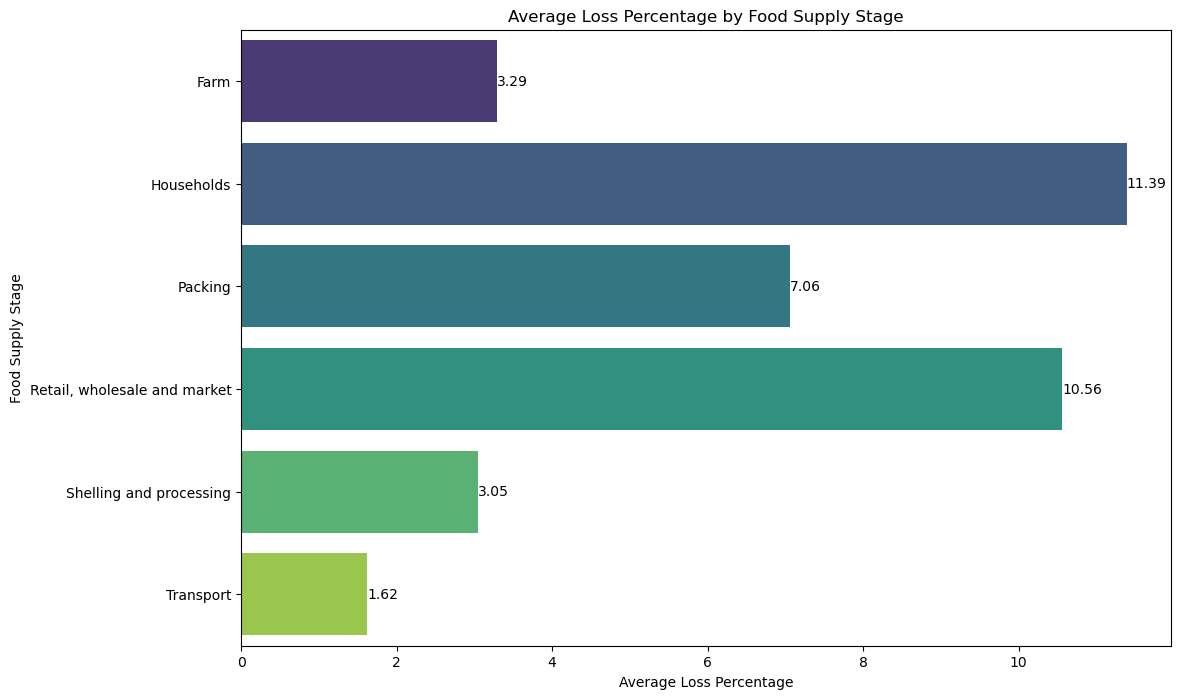

In [13]:
pivot_table_reset = pivot_table.reset_index()

# Count plot based on the pivot table
plt.figure(figsize=(12, 8))
sns.barplot(x='loss_percentage', y='food_supply_stage', data=pivot_table_reset, palette='viridis')
plt.title('Average Loss Percentage by Food Supply Stage')
plt.xlabel('Average Loss Percentage')
plt.ylabel('Food Supply Stage')

# Annotate values on the bars
for index, value in enumerate(pivot_table_reset['loss_percentage']):
    plt.text(value, index, f'{value}', color='black', ha="left", va="center")

plt.show()

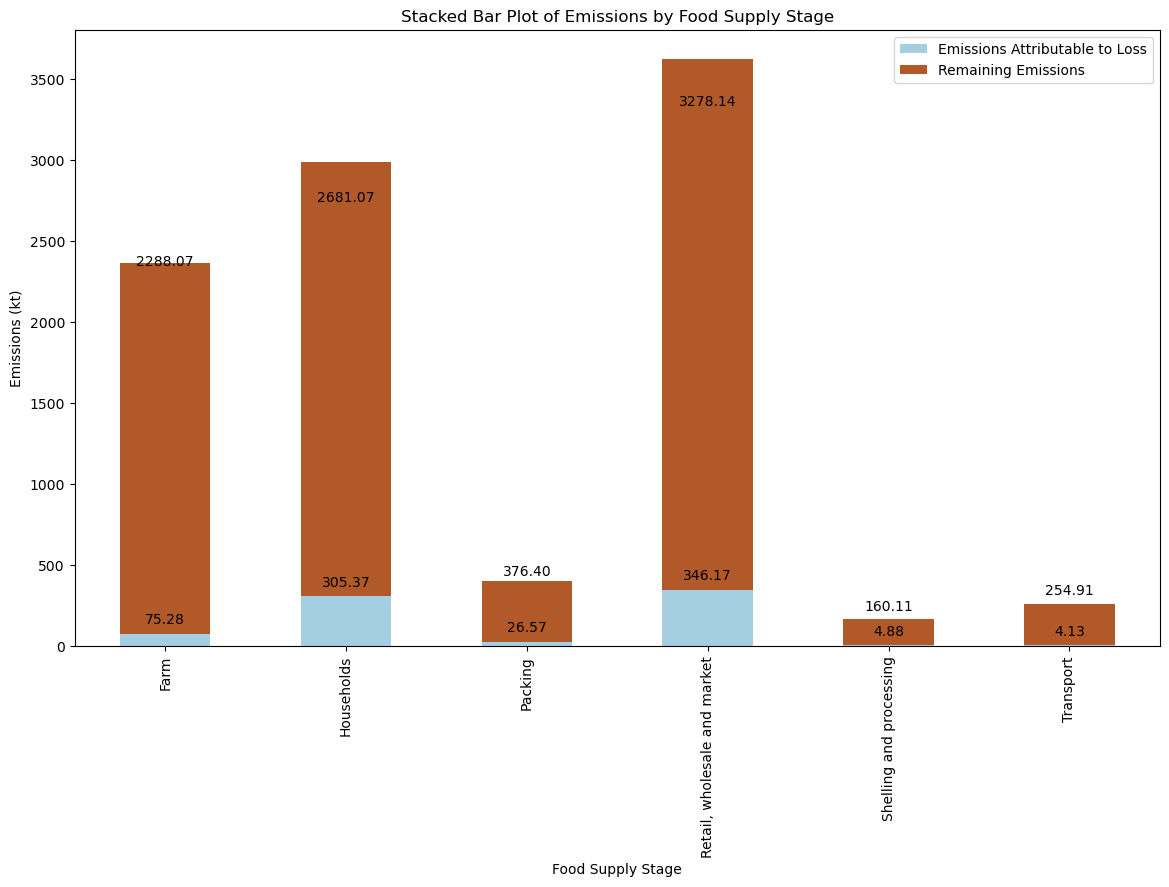

In [15]:
# Plot the stacked bar plot with annotations
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the stacked bars
pivot_table[['loss_emissions', 'value']].plot(kind='bar', stacked=True, ax=ax, colormap='Paired')

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set titles and labels
ax.set_title('Stacked Bar Plot of Emissions by Food Supply Stage')
ax.set_xlabel('Food Supply Stage')
ax.set_ylabel('Emissions (kt)')
ax.legend(['Emissions Attributable to Loss', 'Remaining Emissions'])
plt.xticks(rotation=90)

# Show plot
plt.show()

hypothesis 2:

In [16]:
# Select top commodities by average loss percentage
top_commodities = merged_df.groupby('commodity')['loss_percentage'].mean().nlargest(5).index

# Filter the dataset to include only the top commodities
filtered_df = merged_df[merged_df['commodity'].isin(top_commodities)]

# Display the filtered dataset
filtered_df.head()

,country,year,element,item,unit,value,food_supply_stage,commodity,loss_percentage
719,Australia,2013,Carbon Dioxide (CO2),Food Processing,kt,4314.90,Shelling and processing,"Sweet corn, frozen",38.5
737,Australia,2013,Methane (CH4),Food Processing,kt,1.84,Shelling and processing,"Sweet corn, frozen",38.5
755,Australia,2013,Nitrous Oxide (N2O),Food Processing,kt,0.10,Shelling and processing,"Sweet corn, frozen",38.5
769,Australia,2015,Carbon Dioxide (CO2),Food Household Consumption,kt,4476.58,Households,"Sweet corn, frozen",27.0
776,Australia,2015,Methane (CH4),Food Household Consumption,kt,0.20,Households,"Sweet corn, frozen",27.0


In [18]:
# Summary statistics for loss percentages by commodity and stage
summary_stats = filtered_df.groupby(['food_supply_stage', 'commodity'])['loss_percentage'].describe().round(2)
summary_stats

count  mean  std  \
food_supply_stage            commodity                                       
Households                   Sweet corn, frozen             3.0  27.0  0.0   
Retail, wholesale and market Apricots                       3.0  30.0  0.0   
                             Plums and sloes                3.0  21.5  0.0   
                             Pumpkins, squash and gourds    3.0  20.6  0.0   
                             Watermelons                    3.0  25.4  0.0   
Shelling and processing      Sweet corn, frozen             3.0  38.5  0.0   
Transport                    Pumpkins, squash and gourds    3.0  55.0  0.0   

                                                           min   25%   50%  \
food_supply_stage            commodity                                       
Households                   Sweet corn, frozen           27.0  27.0  27.0   
Retail, wholesale and market Apricots                     30.0  30.0  30.0   
                             Plums and sloes              21.5  21.5  21.5   
                             Pumpkins, squash and gourds  20.6  20.6  20.6   
                             Watermelons                  25.4  25.4  25.4   
Shelling and processing      Sweet corn, frozen           38.5  38.5  38.5   
Transport                    Pumpkins, squash and gourds  55.0  55.0  55.0   

                                                           75%   max  
food_supply_stage            commodity                                
Households                   Sweet corn, frozen           27.0  27.0  
Retail, wholesale and market Apricots                     30.0  30.0  
                             Plums and sloes              21.5  21.5  
                             Pumpkins, squash and gourds  20.6  20.6  
                             Watermelons                  25.4  25.4  
Shelling and processing      Sweet corn, frozen           38.5  38.5  
Transport                    Pumpkins, squash and gourds  55.0  55.0

In [19]:
# Pivot table for average loss percentage by commodity and stage
pivot_table_loss_percentage = filtered_df.pivot_table(index='food_supply_stage', columns='commodity', values='loss_percentage', aggfunc='mean').round(2)

pivot_table_loss_percentage

commodity,Apricots,Plums and sloes,"Pumpkins, squash and gourds","Sweet corn, frozen",Watermelons
food_supply_stage,,,,,
Households,NaN,NaN,NaN,27.0,NaN
"Retail, wholesale and market",30.0,21.5,20.6,NaN,25.4
Shelling and processing,NaN,NaN,NaN,38.5,NaN
Transport,NaN,NaN,55.0,NaN,NaN


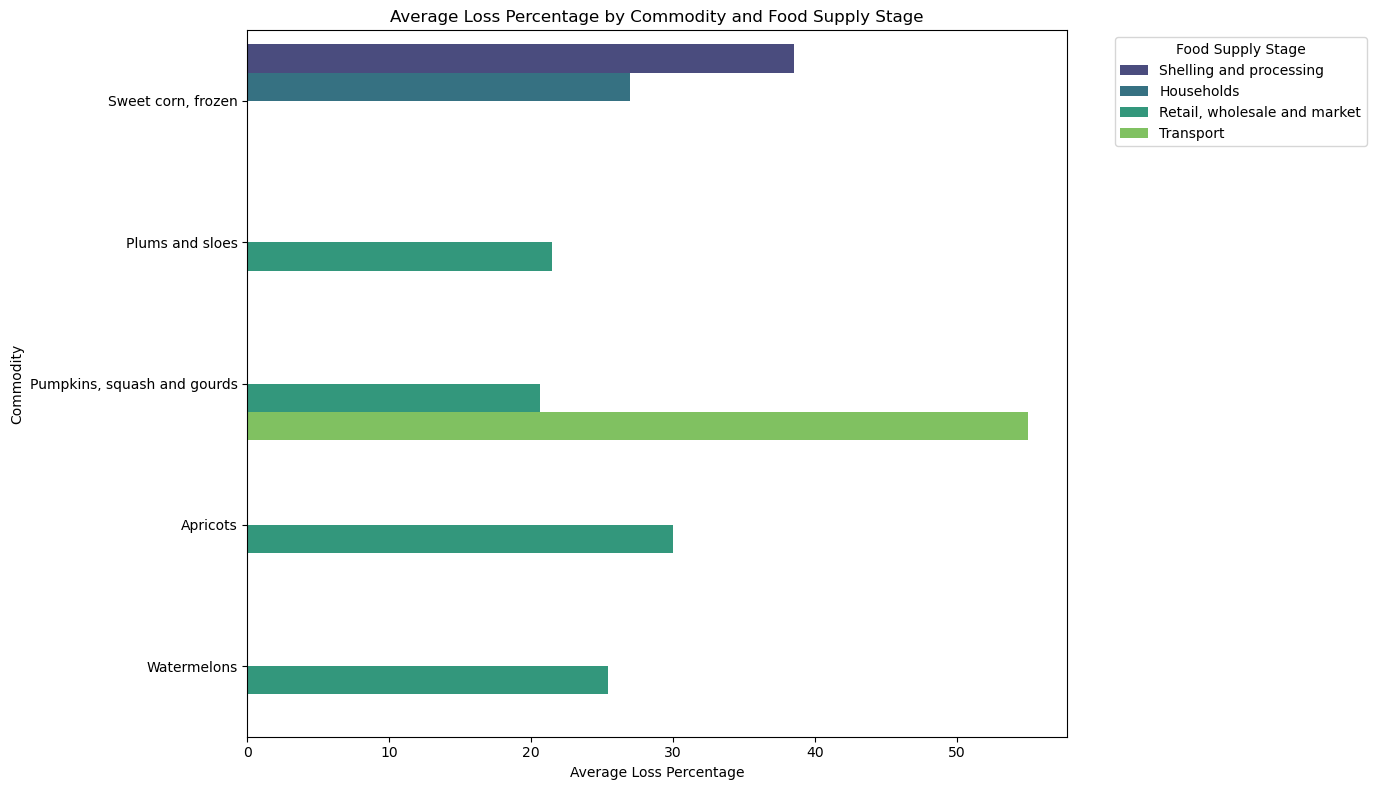

In [20]:
# Bar plot for average loss percentage by commodity and stage
plt.figure(figsize=(14, 8))
sns.barplot(x='loss_percentage', y='commodity', hue='food_supply_stage', data=filtered_df, palette='viridis')
plt.title('Average Loss Percentage by Commodity and Food Supply Stage')
plt.xlabel('Average Loss Percentage')
plt.ylabel('Commodity')
plt.legend(title='Food Supply Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

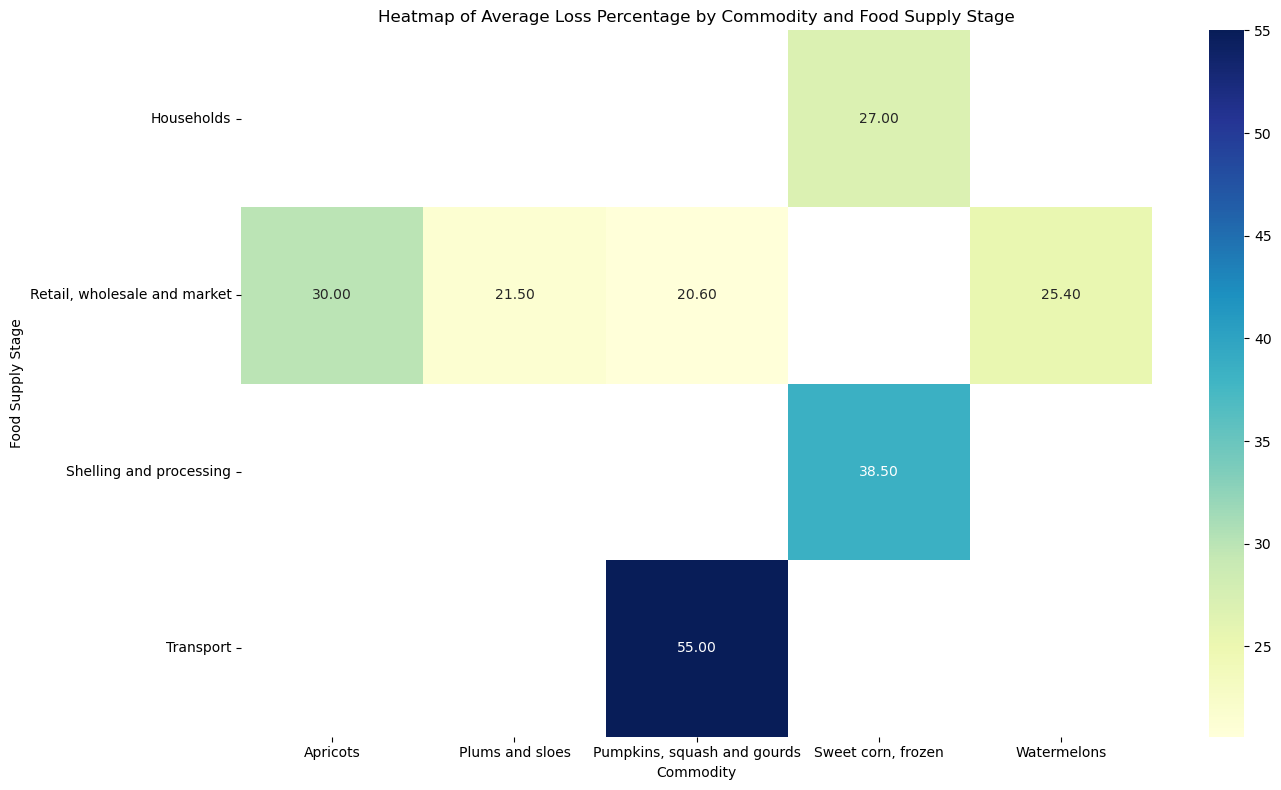

In [21]:
# Heatmap for average loss percentage by commodity and stage
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table_loss_percentage, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Average Loss Percentage by Commodity and Food Supply Stage')
plt.xlabel('Commodity')
plt.ylabel('Food Supply Stage')
plt.tight_layout()
plt.show()